In [1]:
import pandas as pd
#import matplotlib.pyplot as plt
import tensorflow as tf
import numpy
import sys

df = pd.read_csv("data/gender_voice_dataset.csv")
INPUT_SHAPE = 20
LABEL = 'label'
SPLIT_SIZE = 10
EPOCHS = 20

W1016 18:16:22.641939 12692 __init__.py:687] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


In [2]:
from sklearn.preprocessing import LabelEncoder
x = df.drop([LABEL], 1)
y = df[LABEL]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
#print(y)
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

X_train, Y_train = [], []
for i in range(0,SPLIT_SIZE):
    X_train.append(x[int((i*len(x)/SPLIT_SIZE)):(int((i+1)*len(x)/SPLIT_SIZE))])
    Y_train.append(y[(int(i*len(x)/SPLIT_SIZE)):(int((i+1)*len(x)/SPLIT_SIZE))])
    
#print(Y_train)

In [3]:
def model_build() :
    model1 = tf.keras.models.Sequential()
    model1.add(tf.keras.layers.Dense(10, input_shape = (INPUT_SHAPE,), activation='relu', use_bias = False))
    model1.add(tf.keras.layers.Dense(10, activation='relu', use_bias = False))
    model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model1.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model1

In [4]:
models = []
metrics = []
for i in range (0,SPLIT_SIZE):
    models.append(model_build())
    models[i].fit(X_train[i], Y_train[i], epochs = EPOCHS)

for i in range(0,SPLIT_SIZE):
    metrics.append(models[i].evaluate(x_test, y_test))

W1016 18:16:23.920244 12692 deprecation.py:506] From C:\Users\Manish\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1633: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W1016 18:16:24.124957 12692 deprecation.py:323] From C:\Users\Manish\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1016 18:16:24.616383 12692 deprecation.py:323] From C:\Users\Manish\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow_core\python\keras\optimizer_v2\optimizer_v2.py:468: BaseResourceVariable.constraint (from tensorflow.p

Train on 253 samples
Epoch 1/20
253/253 [==============================] - 0s 595us/sample - loss: 1.2708 - acc: 0.5138
Epoch 2/20
253/253 [==============================] - 0s 55us/sample - loss: 0.9992 - acc: 0.5138
Epoch 3/20
253/253 [==============================] - 0s 77us/sample - loss: 0.8019 - acc: 0.5138
Epoch 4/20
253/253 [==============================] - 0s 79us/sample - loss: 0.7296 - acc: 0.4664
Epoch 5/20
253/253 [==============================] - 0s 91us/sample - loss: 0.7557 - acc: 0.4585
Epoch 6/20
253/253 [==============================] - 0s 83us/sample - loss: 0.7059 - acc: 0.4783
Epoch 7/20
253/253 [==============================] - 0s 62us/sample - loss: 0.7046 - acc: 0.4783
Epoch 8/20
253/253 [==============================] - 0s 78us/sample - loss: 0.6993 - acc: 0.4901
Epoch 9/20
253/253 [==============================] - 0s 44us/sample - loss: 0.7027 - acc: 0.4822
Epoch 10/20
253/253 [==============================] - 0s 73us/sample - loss: 0.6901 - acc: 0.48

254/254 [==============================] - 0s 57us/sample - loss: 2.7501 - acc: 0.4567
Epoch 3/20
254/254 [==============================] - 0s 66us/sample - loss: 2.4933 - acc: 0.4567
Epoch 4/20
254/254 [==============================] - 0s 55us/sample - loss: 2.2573 - acc: 0.4567
Epoch 5/20
254/254 [==============================] - 0s 56us/sample - loss: 2.0495 - acc: 0.4567
Epoch 6/20
254/254 [==============================] - 0s 62us/sample - loss: 1.8775 - acc: 0.4567
Epoch 7/20
254/254 [==============================] - 0s 40us/sample - loss: 1.7141 - acc: 0.4567
Epoch 8/20
254/254 [==============================] - 0s 69us/sample - loss: 1.5881 - acc: 0.4567
Epoch 9/20
254/254 [==============================] - 0s 69us/sample - loss: 1.4928 - acc: 0.4567
Epoch 10/20
254/254 [==============================] - 0s 65us/sample - loss: 1.3912 - acc: 0.4567
Epoch 11/20
254/254 [==============================] - 0s 54us/sample - loss: 1.2929 - acc: 0.4606
Epoch 12/20
254/254 [========

Epoch 4/20
253/253 [==============================] - 0s 140us/sample - loss: 0.7284 - acc: 0.4980
Epoch 5/20
253/253 [==============================] - 0s 203us/sample - loss: 0.7076 - acc: 0.5138
Epoch 6/20
253/253 [==============================] - 0s 114us/sample - loss: 0.6928 - acc: 0.5217
Epoch 7/20
253/253 [==============================] - 0s 112us/sample - loss: 0.6880 - acc: 0.5375
Epoch 8/20
253/253 [==============================] - 0s 113us/sample - loss: 0.6886 - acc: 0.5217
Epoch 9/20
253/253 [==============================] - 0s 118us/sample - loss: 0.6852 - acc: 0.5257
Epoch 10/20
253/253 [==============================] - 0s 49us/sample - loss: 0.6780 - acc: 0.5336
Epoch 11/20
253/253 [==============================] - 0s 66us/sample - loss: 0.6759 - acc: 0.5494
Epoch 12/20
253/253 [==============================] - 0s 63us/sample - loss: 0.6740 - acc: 0.5652
Epoch 13/20
253/253 [==============================] - 0s 70us/sample - loss: 0.6726 - acc: 0.5889
Epoch 14/2

In [5]:
sum = 0
for i in metrics:
    print(i[1])
    sum = sum + i[1]

average = sum/SPLIT_SIZE
print(average)

0.52681386
0.64984226
0.52996844
0.50630915
0.49053627
0.5252366
0.50157726
0.45583597
0.626183
0.5
0.5312302798032761


In [6]:
m = models[0].get_weights()
for num in range(1,SPLIT_SIZE):
    a = models[num].get_weights()
    m = numpy.add(m,a)
m /= SPLIT_SIZE
model = model_build()
model.set_weights(m)
loss, acc = model.evaluate(x_test, y_test)
print(acc)
print(loss)  

634/634 [==============================] - 0s 199us/sample - loss: 0.6885 - acc: 0.5252
0.5252366
0.688502864130664


In [7]:
list1 = [0,1,2,3,4,5,6,7,8,9]
def metricsSort(val):
    return metrics[val][1]
list1.sort(key = metricsSort, reverse = True)
print(list1)

[1, 8, 2, 0, 5, 3, 6, 9, 4, 7]


In [9]:
#Selecting Top 5 individually performing models
m2 = models[list1[0]].get_weights()
print(list1[0])
for i in list1[1:5]:
    a = models[i].get_weights()
    m2 = numpy.add(m2,a)
    print(i)

m2 /= 5
print(all([numpy.allclose(x, y) for x, y in zip(m, m2)]))
model2 = model_build()
model2.set_weights(m2)
loss, acc = model2.evaluate(x_test, y_test)
print(acc)
print(loss)  

1
8
2
0
5
False
634/634 [==============================] - 0s 219us/sample - loss: 0.7048 - acc: 0.5252
0.5252366
0.7048063389134331


In [10]:
#Selecting Lowest 5 individually performing models
m3 = models[list1[0]].get_weights()
print(list1[5])
for i in list1[6:10]:
    a = models[i].get_weights()
    m3 = numpy.add(m2,a)
    print(i)

m3 /= 5
print(all([numpy.allclose(x, y) for x, y in zip(m, m3)]))
model3 = model_build()
model3.set_weights(m3)
loss, acc = model3.evaluate(x_test, y_test)
print(acc)
print(loss)  

3
6
9
4
7
False
634/634 [==============================] - 0s 199us/sample - loss: 0.6922 - acc: 0.4968
0.49684542
0.6921681694051821


In [11]:
#Selecting random 5 models
import random
list2 = []
for i in range(0,5):
    list2.append(random.randrange(0,10))
print(list2)
m3 = models[list2[0]].get_weights()
for i in list2:
    a = models[i].get_weights()
    m3 = numpy.add(m2,a)
    print(i)

m3 /= 5
print(all([numpy.allclose(x, y) for x, y in zip(m, m3)]))
model3 = model_build()
model3.set_weights(m3)
loss, acc = model3.evaluate(x_test, y_test)
print(acc)
print(loss)  

[9, 5, 1, 6, 4]
9
5
1
6
4
False
634/634 [==============================] - 0s 247us/sample - loss: 0.6922 - acc: 0.4905
0.49053627
0.6921640822564014


In [149]:
new_population = []

for i in range(10):
    new_population.append(models[i].get_weights())

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 10
num_parents_mating = int(sol_per_pop/2)
best_outputs = []
average_outputs = []
num_generations = 5
no_of_layers = 4

In [150]:
import copy
def cal_pop_fitness(x_input, y_output, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    fitness = []
    for m in pop:
        model = model_build()
        model.set_weights(m)
        loss, acc = model.evaluate(x_input, y_output)
        fitness.append(acc) 
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring 
    # of the next generation.
    parents = []
    print(type(parents))
    for parent_num in range(num_parents):
        max_fitness_idx = fitness.index(max(fitness))
        parents.append(pop[max_fitness_idx])
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring_list = []
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = int(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%len(parents)
        # Index of the second parent to mate.
        parent2_idx = (k+1)%len(parents)
        offspring1 = copy.deepcopy(parents[parent1_idx])
        #Crossing odd numbered weight of Parent2 with Parent1
        p = 0
        for i,layer in enumerate(offspring1):
            if i < no_of_layers-1:
                for j,node in enumerate(layer):
                        for k,weight in enumerate(node):
                            if(p%2 == 1):
                                offspring1[i][j][k] = parents[parent2_idx][i][j][k]
                            p = p+1
        offspring_list.append(offspring1)
    return offspring_list

def mutation(offspring_crossover, num_mutations):
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    for idx in range(len(offspring_crossover)):
        for mutation_num in range(num_mutations):
            layer_idx = random.randint(0, 1)
            node_idx = random.randint(0, 9)
            weight_idx = random.randint(0, 9)
            # The random value to be added to the gene.
            random_value = numpy.random.uniform(-1.0, 1.0, 1)/10
            offspring_crossover[idx][layer_idx][node_idx][weight_idx]= offspring_crossover[idx][layer_idx][node_idx][weight_idx] + random_value
    return offspring_crossover


In [151]:
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(x_test, y_test, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(max(fitness))
    average_outputs.append(numpy.sum(fitness)/sol_per_pop)
    # The best result in the current iteration.
    print("Best result : ", max(fitness))
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    #print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=((sol_per_pop - len(parents), no_of_layers)))
    print("Crossover")
    #print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=10)
    #offspring_mutation = offspring_crossover
    print("Mutation")
    #print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population = []
    for parent in parents:
        new_population.append(parent)
    for offspring in offspring_mutation:
        new_population.append(offspring)
    #new_population = random.shuffle(new_population)


Generation :  0
634/634 [==============================] - 3s 4ms/sample - loss: 0.6765 - acc: 0.5000
Fitness
[0.52681386, 0.64984226, 0.52996844, 0.50630915, 0.49053627, 0.5252366, 0.50157726, 0.45583597, 0.626183, 0.5]
Best result :  0.64984226
<class 'list'>
Parents
Crossover
Mutation
Generation :  1
634/634 [==============================] - 2s 3ms/sample - loss: 5.1927 - acc: 0.5126
Fitness
[0.64984226, 0.626183, 0.52996844, 0.52681386, 0.5252366, 0.48107255, 0.51735014, 0.5252366, 0.5252366, 0.5126183]
Best result :  0.64984226
<class 'list'>
Parents
Crossover
Mutation
Generation :  2
634/634 [==============================] - 2s 3ms/sample - loss: 5.9011 - acc: 0.5221
Fitness
[0.64984226, 0.626183, 0.52996844, 0.52681386, 0.5252366, 0.48895898, 0.5157729, 0.5252366, 0.5252366, 0.52208203]
Best result :  0.64984226
<class 'list'>
Parents
Crossover
Mutation
Generation :  3
634/634 [==============================] - 2s 3ms/sample - loss: 5.1587 - acc: 0.5174
Fitness
[0.64984226, 0.

In [154]:
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(x_test, y_test, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_outputs.append(max(fitness))
average_outputs.append(numpy.sum(fitness)/sol_per_pop)

print("Best solution fitness : ", max(fitness))

x = [0,1,2,3,4,5,6]
import matplotlib.pyplot
matplotlib.pyplot.plot(x, best_outputs)
matplotlib.pyplot.plot(x, average_outputs)
matplotlib.pyplot.xlabel("Generation")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()


634/634 [==============================] - 2s 3ms/sample - loss: 2.3268 - acc: 0.5252


TypeError: 'numpy.float64' object is not callable

Best solution fitness :  0.64984226


ValueError: x and y must have same first dimension, but have shapes (8,) and (5,)

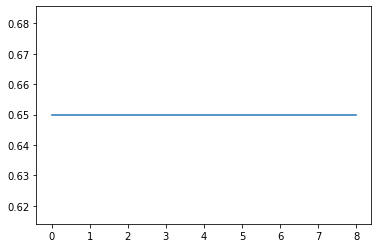

In [156]:
print("Best solution fitness : ", max(fitness))

x = [0,1,2,3,4,5,6,8]
import matplotlib.pyplot
matplotlib.pyplot.plot(x, best_outputs)
matplotlib.pyplot.plot(x, average_outputs)
matplotlib.pyplot.xlabel("Generation")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()
